# IMDB 5000 movie ratings  

This is a dataset containing 5000 imdb movie ratings.I have divided this dataset into 3 parts 70% training set , 20% validation set and 10% as test set.This notebook just contains EDA and data visualization techniques to understand the dataset.I have used many machine learning algorithm on this dataset in my next set of notebooks(The link is in the bottom of this notebook).

Goal of this notebook:
Understand dataset deeper with EDA.Libraries used are : pandas, matplolib and seaborn.

### Understanding the dataset

#### Exploratory Data Analysis(EDA)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_excel('imdb_train.xlsx')

In [4]:
data.head()

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,budget,gross,duration,language,country,content_rating,title_year,facenumber_in_poster,imdb_score
0,AvatarÂ,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,237000000.0,760505847.0,178.0,English,USA,PG-13,2009.0,0.0,7.9
1,Pirates of the Caribbean: At World's EndÂ,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,300000000.0,309404152.0,169.0,English,USA,PG-13,2007.0,0.0,7.1
2,SpectreÂ,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,245000000.0,200074175.0,148.0,English,UK,PG-13,2015.0,1.0,6.8
3,The Dark Knight RisesÂ,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,250000000.0,448130642.0,164.0,English,USA,PG-13,2012.0,0.0,8.5
4,Star Wars: Episode VII - The Force AwakensÂ ...,Documentary,Doug Walker,Doug Walker,Rob Walker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,7.1


In [5]:
data.tail()

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,budget,gross,duration,language,country,content_rating,title_year,facenumber_in_poster,imdb_score
3538,Snow QueenÂ,Adventure|Animation|Family,Vladlen Barbe,Erin Fitzgerald,Wendee Lee,Ivan Okhlobystin,7000000.0,NaN,80.0,Russian,Russia,PG,2012.0,1.0,5.3
3539,Alpha and Omega 4: The Legend of the Saw Tooth...,Action|Adventure|Animation|Comedy|Drama|Family...,Richard Rich,Debi Derryberry,Kate Higgins,Cindy Robinson,7000000.0,NaN,45.0,NaN,USA,NaN,2014.0,0.0,6.0
3540,Pale RiderÂ,Western,Clint Eastwood,Clint Eastwood,Chris Penn,Sydney Penny,6900000.0,41400000.0,115.0,English,USA,R,1985.0,0.0,7.3
3541,Stargate: The Ark of TruthÂ,Action|Adventure|Drama|Fantasy|Sci-Fi,Robert C. Cooper,Ben Browder,Christopher Judge,Julian Sands,NaN,NaN,97.0,English,USA,NaN,2008.0,5.0,7.4
3542,Dazed and ConfusedÂ,Comedy,Richard Linklater,Milla Jovovich,Adam Goldberg,Cole Hauser,6900000.0,7993039.0,102.0,English,USA,R,1993.0,1.0,7.7


In [6]:
data.shape

(3543, 15)

In [7]:
data.size

53145

There are total 3543 columns i.e training data size.
There are total 15 columns.'Movie title' column is just for reference and will not be used for training. Target variable is IMDB rating.Considering these we will be using X dataframe as training set and Y dataframe as out target variable.

In [8]:
dfx= data.drop('movie_title',1)

In [9]:
dfx.shape

(3543, 14)

In [10]:
dfx.isna().sum()

genres                    0
director_name            69
actor_1_name              0
actor_2_name              4
actor_3_name              7
budget                  235
gross                   310
duration                  4
language                  5
country                   4
content_rating           89
title_year               73
facenumber_in_poster      5
imdb_score                0
dtype: int64

Handling missing data:

Numerical data = One way to handle these data is to just drop the rows containing nan values.But doing this can reduce the amount of valuable data.
Another way to handle this is to add indocator values i.e flag the nan values and replace them by '0'(to meet technical requirement)
Or estimate(using mean values of neighbouring data) the missing values and fill them in nan values.
But using these method specifically in our imdb data will mislead the computation,so we can just drop the nan values which will still leave us with sufficient data to train.

Categorical data:
We can add indicator variable here - 'unknown'

With this information, drop the rows that have Nan for columns *budget, gross, duration,title_year and facenumber_in_poster*.
Put 'unknown' for rest of the coulmn containing Nan.

In [11]:
dfx['director_name'].fillna('unknown',inplace=True)
dfx['actor_2_name'].fillna('unknown',inplace=True)
dfx['actor_3_name'].fillna('unknown',inplace=True)
dfx['language'].fillna('unknown',inplace=True)
dfx['country'].fillna('unknown',inplace=True)
dfx['content_rating'].fillna('unknown',inplace=True)

In [12]:
dfx.head()

,genres,director_name,actor_1_name,actor_2_name,actor_3_name,budget,gross,duration,language,country,content_rating,title_year,facenumber_in_poster,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,237000000.0,760505847.0,178.0,English,USA,PG-13,2009.0,0.0,7.9
1,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,300000000.0,309404152.0,169.0,English,USA,PG-13,2007.0,0.0,7.1
2,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,245000000.0,200074175.0,148.0,English,UK,PG-13,2015.0,1.0,6.8
3,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,250000000.0,448130642.0,164.0,English,USA,PG-13,2012.0,0.0,8.5
4,Documentary,Doug Walker,Doug Walker,Rob Walker,unknown,NaN,NaN,NaN,unknown,unknown,unknown,NaN,0.0,7.1


In [13]:
dfx.isna().sum()

genres                    0
director_name             0
actor_1_name              0
actor_2_name              0
actor_3_name              0
budget                  235
gross                   310
duration                  4
language                  0
country                   0
content_rating            0
title_year               73
facenumber_in_poster      5
imdb_score                0
dtype: int64

In [14]:
dfx.dropna(subset=['budget','gross','duration','title_year','facenumber_in_poster'],inplace=True)

dfx = features
dfy = target variable

In [15]:
dfx.isna().sum()

genres                  0
director_name           0
actor_1_name            0
actor_2_name            0
actor_3_name            0
budget                  0
gross                   0
duration                0
language                0
country                 0
content_rating          0
title_year              0
facenumber_in_poster    0
imdb_score              0
dtype: int64

In [16]:
dfx.head()

,genres,director_name,actor_1_name,actor_2_name,actor_3_name,budget,gross,duration,language,country,content_rating,title_year,facenumber_in_poster,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,237000000.0,760505847.0,178.0,English,USA,PG-13,2009.0,0.0,7.9
1,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,300000000.0,309404152.0,169.0,English,USA,PG-13,2007.0,0.0,7.1
2,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,245000000.0,200074175.0,148.0,English,UK,PG-13,2015.0,1.0,6.8
3,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,250000000.0,448130642.0,164.0,English,USA,PG-13,2012.0,0.0,8.5
5,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,263700000.0,73058679.0,132.0,English,USA,PG-13,2012.0,1.0,6.6


We can see that there are 5 numerical feature i.e *budget,gross,duration,title_year,facenumber_in_poster*.So lets plot histogram for these features.

In [17]:
dfy = dfx[['imdb_score']]

In [18]:
dfy.shape

(3096, 1)

In [19]:
dfx=dfx.drop(['imdb_score'],1)

In [20]:
dfx.shape

(3096, 13)

In [21]:
dfx['duration'].min(),dfx['duration'].max(),dfx['duration'].mean()

(45.0, 330.0, 112.21834625322997)

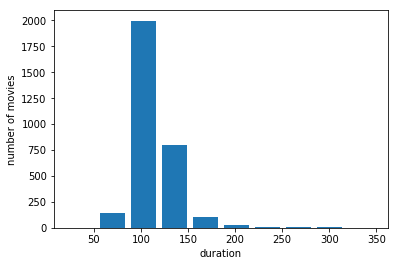

In [22]:
plt.hist(dfx['duration'],range=(20,350),histtype='bar',rwidth=0.8)
plt.xlabel('duration')
plt.ylabel('number of movies')
plt.show()

In [23]:
dfx['title_year'].min(),dfx['title_year'].max(),dfx['title_year'].mean()

(1927.0, 2016.0, 2003.6757105943152)

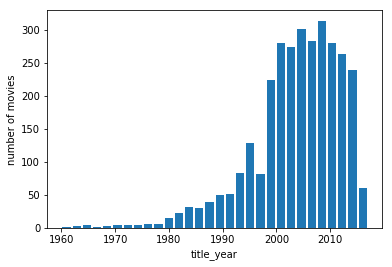

In [24]:
plt.hist(dfx['title_year'],bins=30,range=(1960,2017),histtype='bar',rwidth=0.8)
plt.xlabel('title_year')
plt.ylabel('number of movies')
plt.show()

In [25]:
dfx['budget'].min(),dfx['budget'].max(),dfx['budget'].mean()

(83532.0, 12215500000.0, 53125189.37112403)

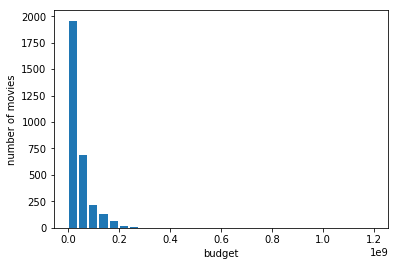

In [26]:
plt.hist(dfx['budget'],bins=30,range=(80000,1200000000),histtype='bar',rwidth=0.8)
plt.xlabel('budget')
plt.ylabel('number of movies')
plt.show()

In [27]:
dfx['facenumber_in_poster'].min(),dfx['facenumber_in_poster'].max(),dfx['facenumber_in_poster'].mean()

(0.0, 43.0, 1.4228036175710594)

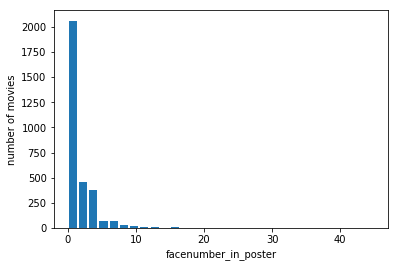

In [28]:
plt.hist(dfx['facenumber_in_poster'],bins=30,range=(0,45),histtype='bar',rwidth=0.8)
plt.xlabel('facenumber_in_poster')
plt.ylabel('number of movies')
plt.show()

In [29]:
dfx['gross'].min(),dfx['gross'].max(),dfx['gross'].mean()

(162.0, 760505847.0, 60130345.454457365)

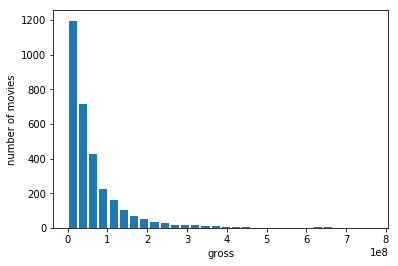

In [30]:
plt.hist(dfx['gross'],bins=30,range=(160,770000000),histtype='bar',rwidth=0.8)
plt.xlabel('gross')
plt.ylabel('number of movies')
plt.show()

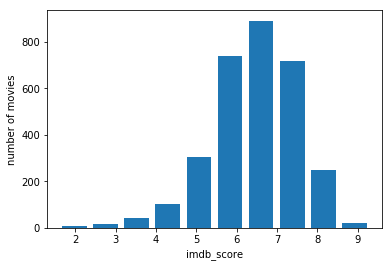

In [31]:
plt.hist(dfy['imdb_score'],histtype='bar',rwidth=0.8)
plt.xlabel('imdb_score')
plt.ylabel('number of movies')
plt.show()

In [32]:
dfy.mean()

imdb_score    6.425355
dtype: float64

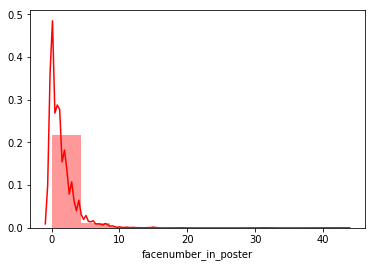

In [33]:
sns.distplot(dfx['facenumber_in_poster'],hist=True,bins=10,color="red")

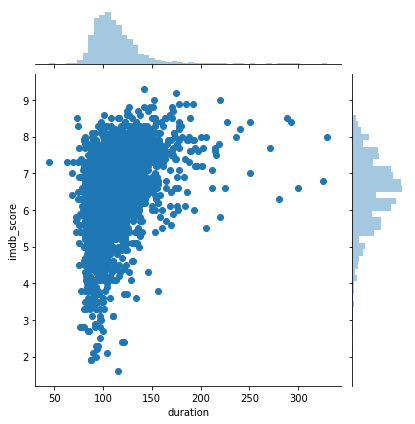

In [34]:
sns.jointplot(dfx['duration'],dfy['imdb_score'],kind='scatter',ratio=5, space=0.2)

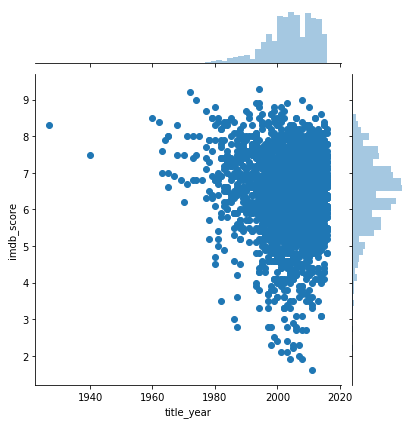

In [35]:
sns.jointplot(dfx['title_year'],dfy['imdb_score'],kind='scatter',ratio=5, space=0.2)

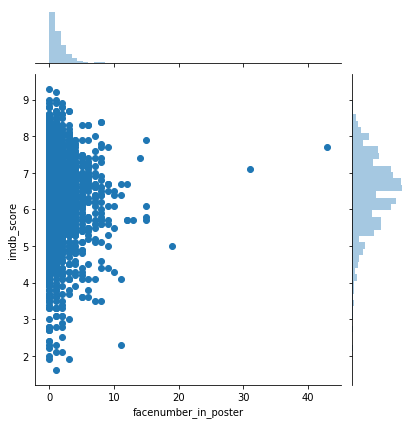

In [36]:
sns.jointplot(dfx['facenumber_in_poster'],dfy['imdb_score'],kind='scatter',ratio=5, space=0.2)

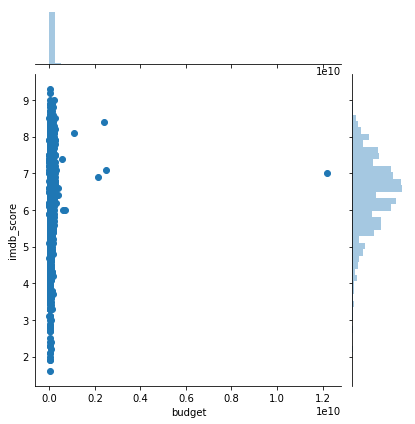

In [112]:
sns.jointplot(dfx['budget'],dfy['imdb_score'],kind='scatter',ratio=5, space=0.2)

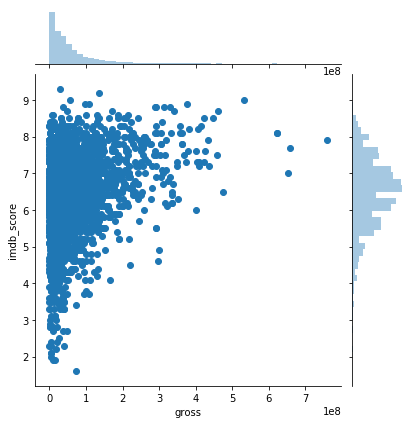

In [39]:
sns.jointplot(dfx['gross'],dfy['imdb_score'],kind='scatter',ratio=5, space=0.2)

categorical and other text features: Bar graphs are essential good for visualizing categorical or text variable

In [40]:
dfx['language'].unique()

array(['English', 'Mandarin', 'Aboriginal', 'Spanish', 'French',
       'Filipino', 'Maya', 'Kazakh', 'Telugu', 'Cantonese', 'Japanese',
       'Aramaic', 'Italian', 'Dutch', 'Dari', 'German', 'Mongolian',
       'Thai', 'Bosnian', 'Korean', 'Hungarian', 'Hindi', 'unknown',
       'Icelandic', 'Danish'], dtype=object)

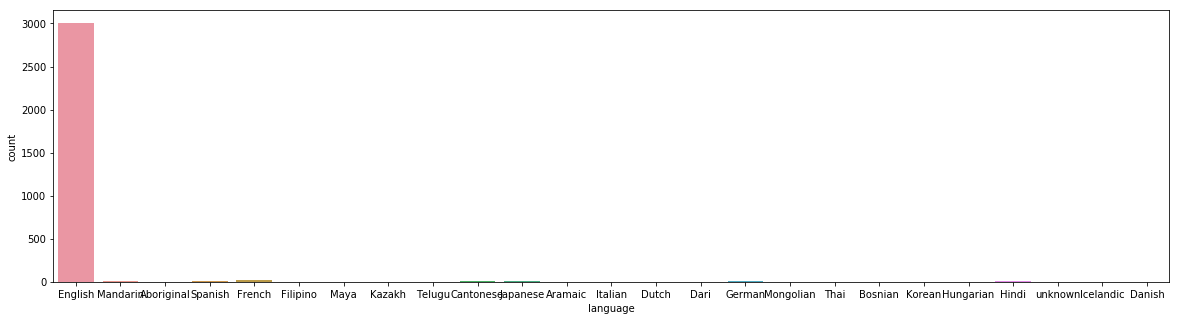

In [41]:
plt.figure(figsize=(20,5))
sns.countplot(data=dfx, x ='language')

In [42]:
pd.value_counts(dfx['language'].values)

English       3006
French          23
Mandarin        15
Japanese         8
Cantonese        6
German           5
Hindi            5
Spanish          5
Italian          3
Korean           3
Aboriginal       2
Thai             2
Bosnian          1
Telugu           1
Kazakh           1
Dutch            1
Aramaic          1
unknown          1
Icelandic        1
Dari             1
Mongolian        1
Filipino         1
Maya             1
Danish           1
Hungarian        1
dtype: int64

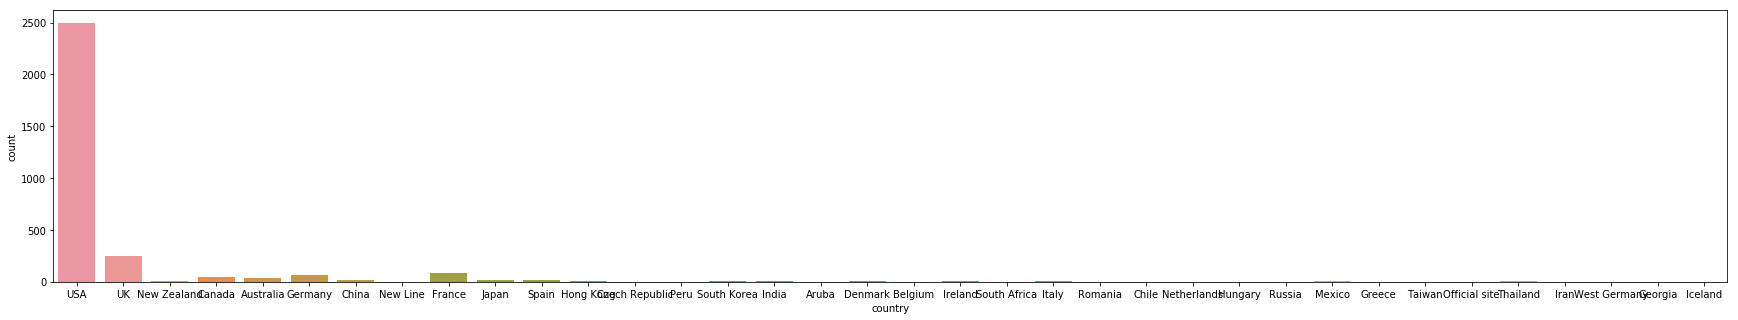

In [43]:
plt.figure(figsize=(30,5))
sns.countplot(data=dfx, x ='country')

In [44]:
pd.value_counts(dfx['country'].values)

USA               2497
UK                 251
France              86
Germany             67
Canada              44
Australia           33
China               14
Japan               13
Spain               13
Hong Kong           11
Italy                7
New Zealand          7
South Korea          7
India                6
Denmark              5
Ireland              5
Thailand             3
Mexico               3
Taiwan               2
Czech Republic       2
Hungary              2
Russia               2
Belgium              2
South Africa         2
Georgia              1
New Line             1
Romania              1
Official site        1
Peru                 1
Greece               1
West Germany         1
Chile                1
Aruba                1
Iceland              1
Netherlands          1
Iran                 1
dtype: int64

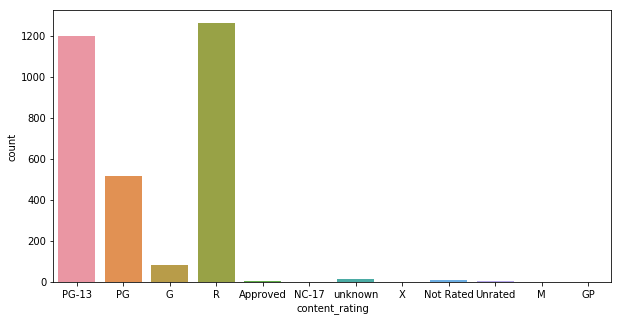

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(data=dfx, x ='content_rating')

In [46]:
pd.value_counts(dfx['content_rating'].values)

R            1262
PG-13        1198
PG            518
G              84
unknown        12
Not Rated      10
Approved        6
Unrated         2
X               1
M               1
NC-17           1
GP              1
dtype: int64

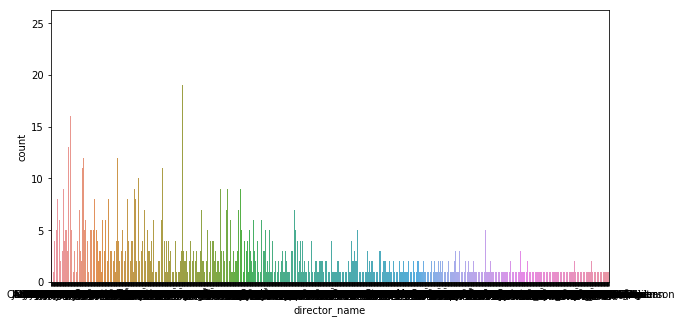

In [47]:
#this plot is not necessary as this feature has many values
plt.figure(figsize=(10,5))
sns.countplot(data=dfx, x ='director_name')

In [48]:
pd.value_counts(dfx['director_name'].values)

Steven Spielberg      25
Clint Eastwood        19
Woody Allen           17
Martin Scorsese       16
Ridley Scott          16
Renny Harlin          14
Tim Burton            14
Ron Howard            13
Steven Soderbergh     13
Robert Zemeckis       13
Michael Bay           13
Shawn Levy            12
Robert Rodriguez      12
Tony Scott            12
Joel Schumacher       12
Chris Columbus        11
Rob Reiner            11
Barry Levinson        11
Oliver Stone          11
John McTiernan        10
Rob Cohen             10
Sam Raimi             10
Wes Craven            10
Brett Ratner          10
David Fincher         10
Paul W.S. Anderson    10
Stephen Frears         9
Dennis Dugan           9
Spike Lee              9
Martin Campbell        9
                      ..
William A. Fraker      1
Vicky Jenson           1
Akiva Schaffer         1
Jim Gillespie          1
Anthony Hemingway      1
Robert Marcarelli      1
Marc SchÃ¶lermann      1
Roger Christian        1
Edward Norton          1


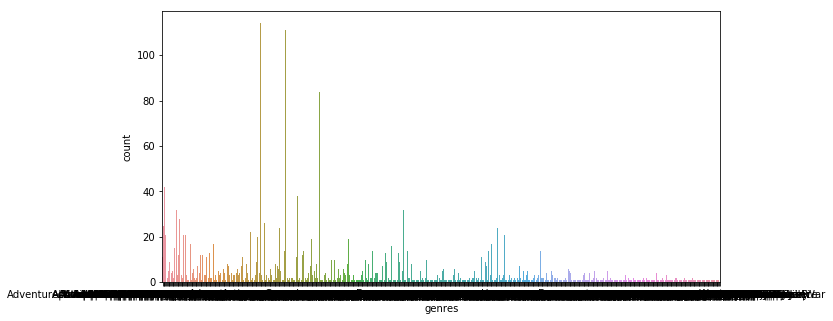

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(data=dfx, x ='genres')

In [51]:
pd.value_counts(dfx['genres'].values)

Comedy|Romance                                              114
Comedy                                                      111
Comedy|Drama|Romance                                        111
Drama|Romance                                                85
Comedy|Drama                                                 84
Drama                                                        79
Crime|Drama|Thriller                                         65
Action|Crime|Thriller                                        54
Action|Adventure|Sci-Fi                                      48
Action|Crime|Drama|Thriller                                  45
Action|Adventure|Thriller                                    42
Comedy|Crime                                                 42
Crime|Drama|Mystery|Thriller                                 38
Action|Adventure|Sci-Fi|Thriller                             32
Drama|Thriller                                               32
Adventure|Animation|Comedy|Family|Fantas

In [52]:
genre= dfx['genres'].str.split('|')

In [53]:
genre

0                    [Action, Adventure, Fantasy, Sci-Fi]
1                            [Action, Adventure, Fantasy]
2                           [Action, Adventure, Thriller]
3                                      [Action, Thriller]
5                             [Action, Adventure, Sci-Fi]
6                            [Action, Adventure, Romance]
7       [Adventure, Animation, Comedy, Family, Fantasy...
8                             [Action, Adventure, Sci-Fi]
9                   [Adventure, Family, Fantasy, Mystery]
10                            [Action, Adventure, Sci-Fi]
11                            [Action, Adventure, Sci-Fi]
12                                    [Action, Adventure]
13                           [Action, Adventure, Fantasy]
14                           [Action, Adventure, Western]
15                   [Action, Adventure, Fantasy, Sci-Fi]
16                   [Action, Adventure, Family, Fantasy]
17                            [Action, Adventure, Sci-Fi]
18            

In [54]:
pd.value_counts(genre=='Action')

False    3096
Name: genres, dtype: int64

In [55]:
a=0
for i in genre:
    for j in i:
        if j =='Action':
            a+=1
print(a)

911


In [56]:
a=0
for i in genre:
    for j in i:
        if j =='Comedy':
            a+=1
print(a)

1212


In [57]:
a=0
for i in genre:
    for j in i:
        if j =='Romance':
            a+=1
print(a)

720


In [58]:
a=0
for i in genre:
    for j in i:
        if j =='Drama':
            a+=1
print(a)

1488


In [59]:
a=0
for i in genre:
    for j in i:
        if j =='Thriller':
            a+=1
print(a)

960


In [65]:
categories = set([s for g_list in dfx.genres.unique() for s in g_list.split("|")])

# one-hot encode
for cat in categories:
    dfx[cat] = dfx.genres.transform(lambda s: int(cat in s))
    

In [61]:
dfx.head()

,genres,director_name,actor_1_name,actor_2_name,actor_3_name,budget,gross,duration,language,country,...,Family,Mystery,History,Adventure,Sport,Musical,Western,Fantasy,Sci-Fi,Crime
0,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,237000000.0,760505847.0,178.0,English,USA,...,0,0,0,1,0,0,0,1,1,0
1,Action|Adventure|Fantasy,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,300000000.0,309404152.0,169.0,English,USA,...,0,0,0,1,0,0,0,1,0,0
2,Action|Adventure|Thriller,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,245000000.0,200074175.0,148.0,English,UK,...,0,0,0,1,0,0,0,0,0,0
3,Action|Thriller,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,250000000.0,448130642.0,164.0,English,USA,...,0,0,0,0,0,0,0,0,0,0
5,Action|Adventure|Sci-Fi,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,263700000.0,73058679.0,132.0,English,USA,...,0,0,0,1,0,0,0,0,1,0


In [67]:
for col in dfx.columns:
    print(col)

genres
director_name
actor_1_name
actor_2_name
actor_3_name
budget
gross
duration
language
country
content_rating
title_year
facenumber_in_poster
Horror
Thriller
Animation
Action
Music
Biography
Drama
War
Documentary
Romance
Comedy
Family
Mystery
History
Adventure
Sport
Musical
Western
Fantasy
Sci-Fi
Crime


In [103]:
dfg = dfx[['genres','duration','director_name','gross','budget']+list(categories)]

In [104]:
dfg.head()

,genres,duration,director_name,gross,budget,Horror,Thriller,Animation,Action,Music,...,Family,Mystery,History,Adventure,Sport,Musical,Western,Fantasy,Sci-Fi,Crime
0,Action|Adventure|Fantasy|Sci-Fi,178.0,James Cameron,760505847.0,237000000.0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
1,Action|Adventure|Fantasy,169.0,Gore Verbinski,309404152.0,300000000.0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2,Action|Adventure|Thriller,148.0,Sam Mendes,200074175.0,245000000.0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,Action|Thriller,164.0,Christopher Nolan,448130642.0,250000000.0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Action|Adventure|Sci-Fi,132.0,Andrew Stanton,73058679.0,263700000.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [105]:
#convert wide to long (https://www.geeksforgeeks.org/python-pandas-melt/)
dfg = pd.melt(dfg, id_vars=['gross'],value_vars = list(categories),var_name = 'Category',value_name = 'Count')

In [106]:
dfg.head()

,gross,Category,Count
0,760505847.0,Horror,0
1,309404152.0,Horror,0
2,200074175.0,Horror,0
3,448130642.0,Horror,0
4,73058679.0,Horror,0


In [107]:
dfg = dfg.loc[dfg.Count>0]

In [108]:
dfg.head()

,gross,Category,Count
45,202351611.0,Horror,1
70,102176165.0,Horror,1
112,256386216.0,Horror,1
129,79711678.0,Horror,1
131,61937495.0,Horror,1


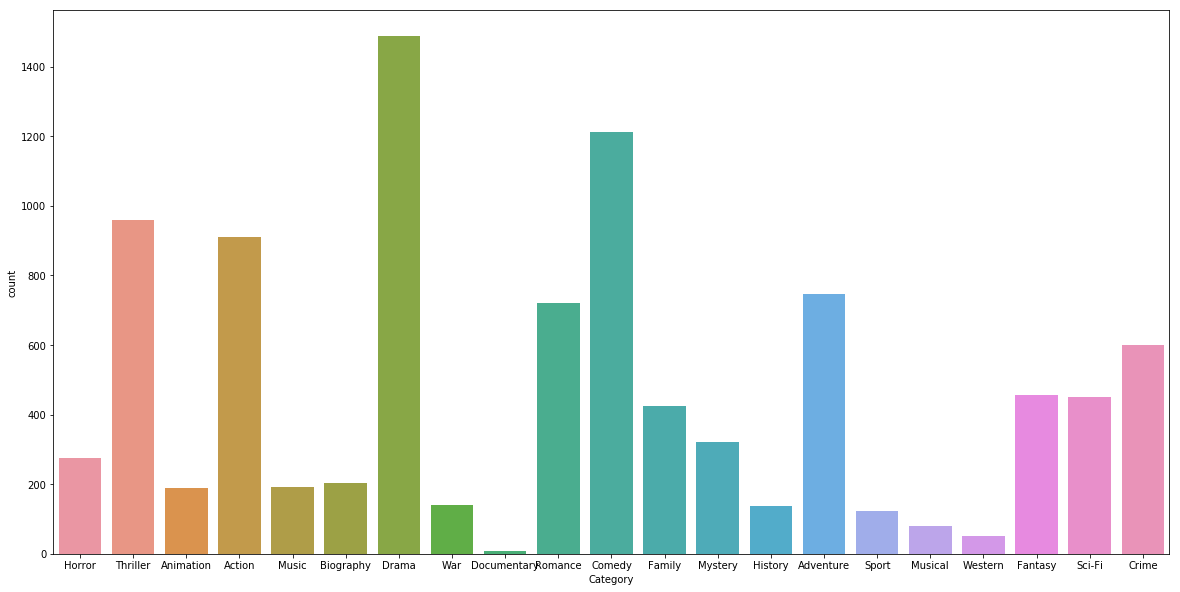

In [109]:
plt.figure(figsize=(20,10))
sns.countplot(data=dfg, x = 'Category')

So as we can see most movies are of genre *Drama* and *Comedy*

In [122]:
top_movies=data.sort_values(by='imdb_score',ascending=False)

In [136]:
top_movies.dropna(inplace=True)

In [169]:
top_250=top_movies.head(250)

relation between features and target variable

<Figure size 1440x720 with 0 Axes>

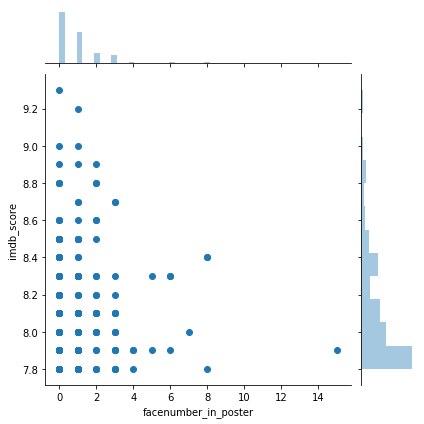

In [170]:
plt.figure(figsize=(20,10))
sns.jointplot(top_250['facenumber_in_poster'],top_250['imdb_score'],kind='scatter',ratio=5, space=0.2)

<Figure size 1440x720 with 0 Axes>

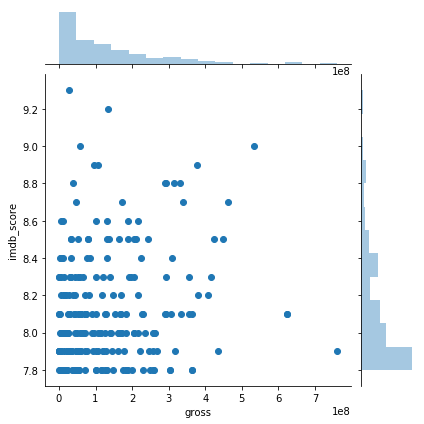

In [171]:
plt.figure(figsize=(20,10))
sns.jointplot(top_250['gross'],top_250['imdb_score'],kind='scatter',ratio=5, space=0.2)

<Figure size 1440x720 with 0 Axes>

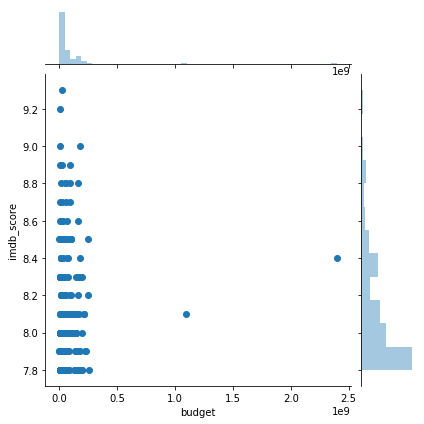

In [172]:
plt.figure(figsize=(20,10))
sns.jointplot(top_250['budget'],top_250['imdb_score'],kind='scatter',ratio=5, space=0.2)

<Figure size 1440x720 with 0 Axes>

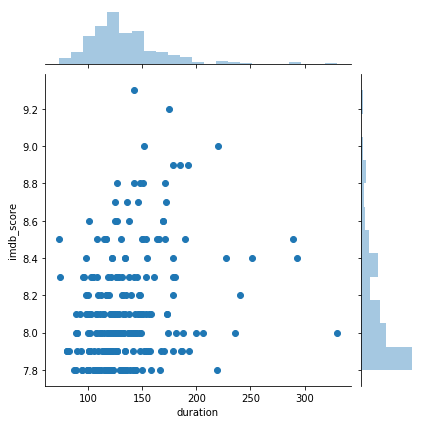

In [173]:
plt.figure(figsize=(20,10))
sns.jointplot(top_250['duration'],top_250['imdb_score'],kind='scatter',ratio=5, space=0.2)

<Figure size 1440x720 with 0 Axes>

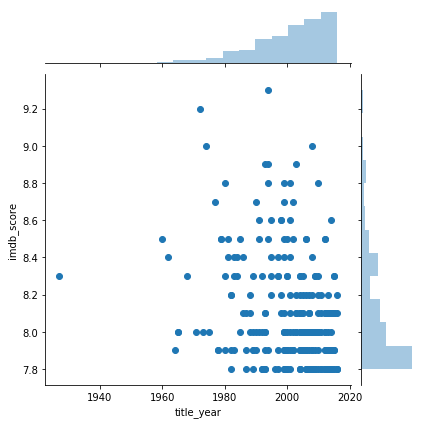

In [174]:
plt.figure(figsize=(20,10))
sns.jointplot(top_250['title_year'],top_250['imdb_score'],kind='scatter',ratio=5, space=0.2)

In [227]:
#highest grossing movie of 2016
a=top_250[top_250['title_year']==2016.0] 
a[a['gross']==a['gross'].max()]['movie_title']

27    Captain America: Civil WarÂ 
Name: movie_title, dtype: object

In [229]:
#least grossing movie of 2016
a=top_250[top_250['title_year']==2016.0] 
a[a['gross']==a['gross'].min()]['movie_title']

1196    The Conjuring 2Â 
Name: movie_title, dtype: object

In [228]:
#highest budget movie of 2016
a=top_250[top_250['title_year']==2016.0] 
a[a['budget']==a['budget'].max()]['movie_title']

27    Captain America: Civil WarÂ 
Name: movie_title, dtype: object

In [230]:
#least budget movie of 2016
a=top_250[top_250['title_year']==2016.0] 
a[a['budget']==a['budget'].min()]['movie_title']

1196    The Conjuring 2Â 
Name: movie_title, dtype: object

<Figure size 1440x720 with 0 Axes>

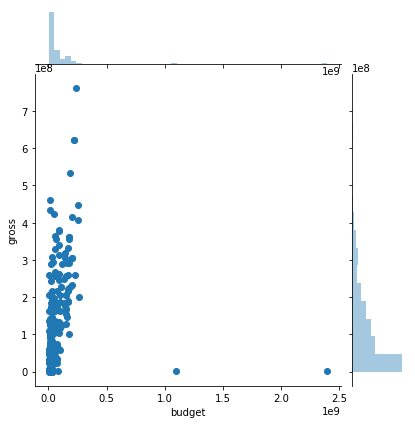

In [175]:
plt.figure(figsize=(20,10))
sns.jointplot(top_250['budget'],top_250['gross'],kind='scatter',ratio=5, space=0.2)

In [189]:
#lets look at the gross of movie whose budget was maximum 
top_250[top_250['budget']==top_250['budget'].max()]

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,budget,gross,duration,language,country,content_rating,title_year,facenumber_in_poster,imdb_score
2323,Princess MononokeÂ,Adventure|Animation|Fantasy,Hayao Miyazaki,Minnie Driver,Jada Pinkett Smith,Billy Crudup,2.400000e+09,2298191.0,134.0,Japanese,Japan,PG-13,1997.0,0.0,8.4


In [190]:
#lets look at the budget of movie whose gross was maximum 
top_250[top_250['gross']==top_250['gross'].max()]

,movie_title,genres,director_name,actor_1_name,actor_2_name,actor_3_name,budget,gross,duration,language,country,content_rating,title_year,facenumber_in_poster,imdb_score
0,AvatarÂ,Action|Adventure|Fantasy|Sci-Fi,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,237000000.0,760505847.0,178.0,English,USA,PG-13,2009.0,0.0,7.9
